In [1089]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras import layers, models
from sklearn.model_selection import train_test_split


In [1090]:
file = 'diabetes.csv'
df = pd.read_csv(file, index_col=0)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1


In [1091]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [1092]:
y = df.pop('Outcome').to_numpy()

df['Glucose'].replace(0,df['Glucose'].mean(), inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(), inplace=True)

In [1093]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.681605,72.254807,20.536458,79.799479,31.992578,0.471876,33.240885
std,30.436016,12.115932,15.952218,115.244002,7.884160,0.331329,11.760232
min,44.000000,24.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.750000,64.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

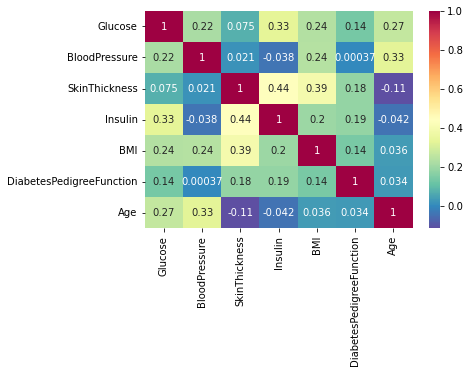

In [1094]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral_r')

In [1095]:
scaler = StandardScaler()
x = scaler.fit_transform(df, y)

In [1096]:
model = models.Sequential([
        layers.Flatten(input_shape=(7,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')    
    ])

In [1097]:
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [1098]:
model.fit(
    x=x,
    y=y,
    batch_size=16,
    epochs=20,
    validation_split=0.33,
    class_weight={0:1,
                  1:1,
                  2:1,
                  3:0.2,
                  4:0.2,
                  5:0.2,
                  6:1}
)

Epoch 1/20
33/33 [==============================] - 1s 8ms/step - loss: 0.6193 - accuracy: 0.6790 - val_loss: 0.5458 - val_accuracy: 0.7559
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5368 - accuracy: 0.7393 - val_loss: 0.4802 - val_accuracy: 0.7835
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7588 - val_loss: 0.4551 - val_accuracy: 0.8071
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7821 - val_loss: 0.4380 - val_accuracy: 0.8189
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7840 - val_loss: 0.4301 - val_accuracy: 0.8110
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7899 - val_loss: 0.4256 - val_accuracy: 0.8071
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4617 - accuracy: 0.7938 - val_loss: 0.4243 - val_accuracy: 0.8071
Epoch 8/20
33/33 [==

In [1099]:
_, x_test, _, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
model = models.load_model('Neural_network')
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.3751 - accuracy: 0.8189


[0.37507736682891846, 0.8188976645469666]